# Programación declarativa @ GIA - URJC
## Curso 22-23
## Convocatoria extraordinaria
## Prueba 2

La duración de la prueba es de 1 hora y 15 minutos.


In [76]:
import $ivy.`org.scalatest::scalatest:3.0.8`
import org.scalatest._

import $ivy.$                               

import org.scalatest._

# Definiciones auxiliares

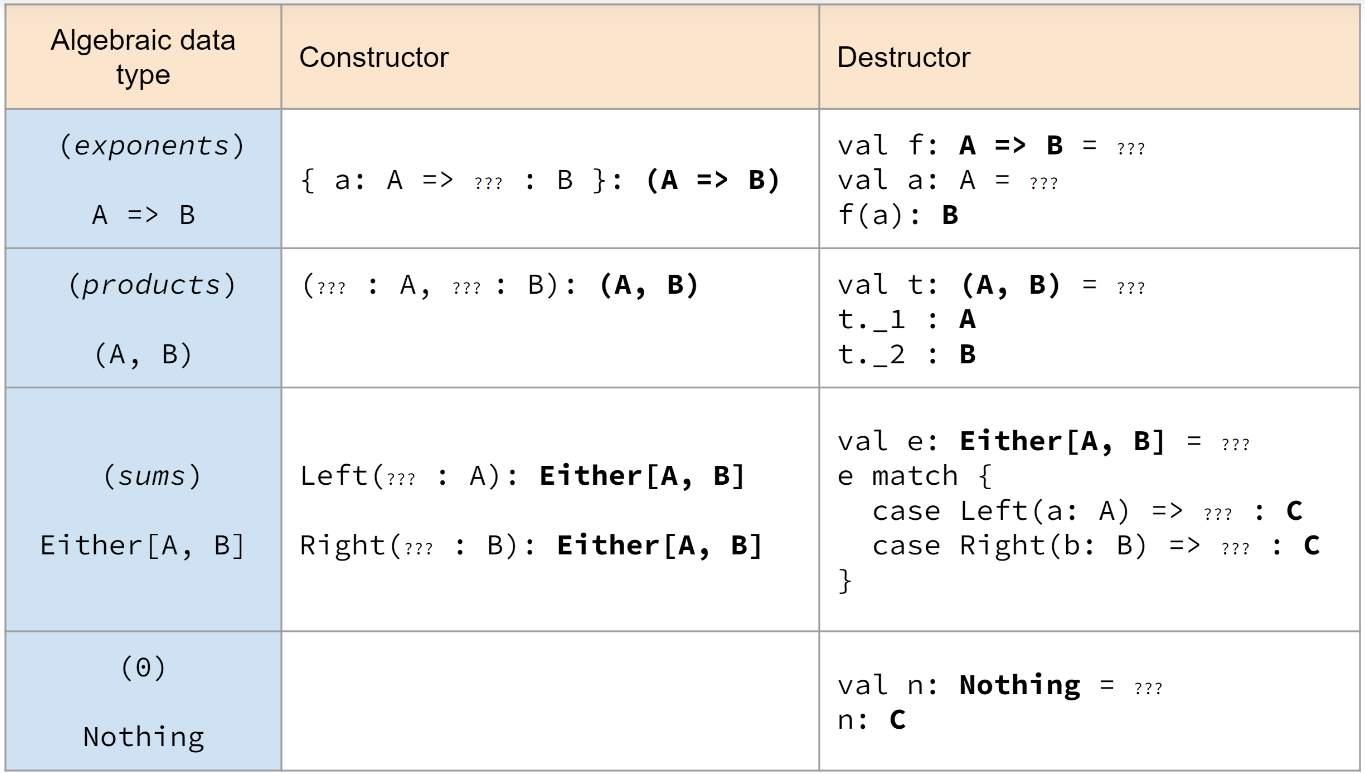

In [2]:
object StandardTypes{
    
    // type Option[X] = 1 + X
    
    sealed trait Option[+X]
    case object None extends Option[Nothing]
    case class Some[A](a: A) extends Option[A]
    
    // type Either[X, Y] = X + Y
    
    sealed trait Either[X, Y]
    case class Left[X, Y](x: X) extends Either[X, Y]
    case class Right[X, Y](y: Y) extends Either[X, Y]
}

defined object StandardTypes

In [3]:
object Signatures{
    abstract class List[A]{
        
        // Common HOFs
        def foldRight[B](nil: B)(cons: (A, B) => B): B
        def foldLeft[B](initial: B)(update: (B, A) => B): B
        def map[B](f: A => B): List[B]
        def flatMap[B](f: A => List[B]): List[B]
        def filter(f: A => Boolean): List[A]
        def forall(pred: A => Boolean): Boolean
        def reduce(f: (A, A) => A): A
 
        // Returns the number of elements of this list
        def length: Int
        def reverse: List[A]
    }
}

defined object Signatures

In [38]:
// type Tree[A] = 1 + Tree[A] * A * Tree[A]

sealed abstract class Tree[A]
case class Empty[A]() extends Tree[A]
case class Node[A](left: Tree[A], root: A, right: Tree[A]) extends Tree[A]

defined class Tree
defined class Empty
defined class Node

The companion object defines some smart constructors that will allow us to write test cases more easily.

In [66]:
object Tree{
    
    def void[A]: Tree[A] = 
        Empty()
    
    def leaf[A](a: A): Node[A] = 
        Node(Empty(), a, Empty())
    
    def right[A](a: A, tree: Tree[A]): Node[A] = 
        Node(Empty(), a, tree)
    
    def left[A](tree: Tree[A], a: A): Node[A] = 
        Node(tree, a, Empty())
    
    def node[A](left: Tree[A], a: A, right: Tree[A]): Node[A] = 
        Node(left, a, right)
    
    def foldTree[A, B](t: Tree[A])(empty: B, node: (B, A, B) => B): B = 
        t match {
            case Empty() => empty
            case Node(left, root, right) => node(foldTree(left)(empty, node), root, foldTree(right)(empty, node))
        }
}

import Tree._

defined object Tree
import Tree._

In [1]:
type Not[P] = P => Nothing

defined type Not

# Ejercicio 1
__(2 puntos)__

__a) (1 punto)__ Demuestra la siguiente deducción de la lógica proposicional intuicionista utilizando la correspondencia de Curry-Howard:


$\{p \rightarrow (q \vee \neg r), \neg r \rightarrow \neg s\} \vdash p \rightarrow (\neg q \rightarrow \neg s)$

In [2]:
def proof[P, Q, R, S](p1: P => Either[Q, Not[R]], p2: Not[R] => Not[S]): P => Not[Q] => Not[S] = 
    (p: P) => p1(p) match {
        case Left(q: Q) => 
            nq => nq(q)
        case Right(nr: Not[R]) => 
            _ => p2(nr)
    }

defined function proof

__b) (1 punto)__ Demuestra la siguiente tautología de la lógica proposicional clásica utilizando la correspondencia de Curry-Howard:

$\vdash_c (p \rightarrow q) \vee (q \rightarrow r) $ 

Para ello, se deberá asumir que se cumple la ley del tercio excluso para la proposición $q$. 

In [4]:
def proof[P, Q, R](lemq: Either[Q, Not[Q]]): Either[P => Q, Q => R] = 
    lemq match {
        case Left(q) => 
            Left(_ => q)
        case Right(nq) => 
            Right(q => nq(q)) // Equivalentemente, Right(nq)
    }

defined function proof

# Ejercicio 2
__(2 puntos)__ La siguiente función calcula el producto de una progresión aritmética de `n` elementos, con elemento inicial `a` y diferencia `d`:

In [43]:
def product(a: Int, d: Int, n: Int): Int = {
    var out: Int = 1
    for (i <- a to (a+(n-1)*d) by d)
        out *= i
    out
}  

defined function product

In [44]:
class TestProduct(product: (Int, Int, Int) => Int) extends FlatSpec with Matchers{
    
    "product" should "work" in {
        product(1, 10000, 1) shouldBe 1
        product(1, 1, 5) shouldBe 120
        product(1, 3, 4) shouldBe 280
        product(10, 5, 6) shouldBe 78750000
    }
}


defined class TestProduct

In [45]:
run(new TestProduct(product))

cmd43$Helper$TestProduct:
product
- should work


__a) (1 punto)__ Reimplementa la función `product` utilizando la función de orden superior `foldLeft`. Para ello, téngase en cuenta que un rango de números `1 to n` puede transformarse en una lista mediante el método `toList`. Por ejemplo, `(1 to 3 by 1).toList == List(1,2,3)`.

In [6]:
def product(a: Int, d: Int, n: Int): Int =
    //(a to (a+(n-1)*d) by d).toList.foldLeft(1)((out, i) => out*i)
    (a to (a+(n-1)*d) by d).toList.foldLeft(1)(_*_)

defined function product

In [47]:
run(new TestProduct(product))

cmd43$Helper$TestProduct:
product
- should work


__b) (1 punto)__ La librería estándar de Scala proporciona la función de orden superior [`reduce`](https://www.scala-lang.org/api/2.13.3/scala/collection/immutable/List.html#reduce[B%3E:A](op:(B,B)=%3EB):B) como método del tipo `List[A]`. A continuación se muestra su especificación _simplificada_: 

```scala
class List[A]{
    // Reduces the elements of this collection using the specified associative binary operator
    def reduce(op: (A, A) => A): A
}
```

Reimplemente la función `product` utilizando la función `reduce`.

In [78]:
def product(a: Int, d: Int, n: Int): Int =
    (a to (a+(n-1)*d) by d).toList.reduce(_*_)
    // O simplemente: (a to (a+(n-1)*d) by d).reduce(_*_), puesto que el tipo `Range` también implementa la operación `reduce`

defined function product

In [49]:
run(new TestProduct(product))

cmd43$Helper$TestProduct:
product
- should work


# Ejercicio 3
__(4,5 puntos)__

__a) (0,5 puntos)__ La función `duplicate` recibe un árbol de elementos cualesquiera y devuelve un árbol con la misma estructura donde los elementos de los nodos se encuentran duplicados. Por ejemplo: 

In [53]:
class TestDuplicate(duplicate: Tree[Int] => Tree[(Int, Int)]) extends FlatSpec with Matchers{
    
    "duplicate" should "work" in {
        duplicate(void) shouldBe void
        duplicate(node(left(leaf(1),3),4,left(right(3, leaf(9)),10))) shouldBe node(left(leaf((1,1)),(3,3)),(4,4),left(right((3,3), leaf((9,9))),(10,10)))
    }
}

defined class TestDuplicate

Implementa recursivamente la función `duplicate`.

In [51]:
def duplicate[A](t: Tree[A]): Tree[(A, A)] = 
    t match {
        case Empty() => Empty()
        case Node(left, root, right) => 
            Node(duplicate(left), (root, root), duplicate(right))
    }

defined function duplicate

In [52]:
run(new TestDuplicate(duplicate[Int]))

cmd49$Helper$TestDuplicate:
duplicate
- should work


__b) (1 punto)__ Implementa recursivamente la función `fusion` especificada de la siguiente forma: 

In [79]:
class TestFusion(fusion: Tree[(Int, Int, Int)] => Tree[Int]) extends FlatSpec with Matchers{
    
    "fusion" should "work" in {
        fusion(void) shouldBe void
        fusion(node(left(leaf((1,2,3)),(4,5,6)),(0,0,0),left(right((3,3,3), leaf((9,8,1))),(10,1,0)))) shouldBe 
               node(left(leaf(6)      ,15)     ,0      ,left(right(9      , leaf(18))     ,11))
    }
}

defined class TestFusion

Como se puede observar, la función `fusion` recibe un árbol cuyos elementos son tripletas de enteros, y devuelve un árbol con la misma estructura cuyos elementos resultan de sumar dichas tripletas.

In [60]:
def fusion(t: Tree[(Int, Int, Int)]): Tree[Int] = 
    t match {
        case Empty() => Empty()
        case Node(left, (a,b,c), right) => 
            Node(fusion(left), a+b+c, fusion(right))
    }

defined function fusion

In [61]:
run(new TestFusion(fusion))

cmd58$Helper$TestFusion:
fusion
- should work


__c) (1 punto)__ Se desean generalizar las dos funciones anteriores por medio de una función `map`. Esta función recibe un árbol de elementos cualquiera y devuelve un árbol con la misma estructura cuyos elementos resultan de aplicar una función recibida como párametro a los elementos del árbol original. Por ejemplo: 

In [56]:
class TestMap(map: Tree[Int] => (Int => String) => Tree[String]) extends FlatSpec with Matchers{
    
    "map" should "work for _.toString" in {
        map(void)(_.toString) shouldBe void
        map(left(node(leaf(1),3,leaf(4)),4))(_.toString) shouldBe left(node(leaf("1"),"3",leaf("4")),"4")
    }
    
    "map" should "work for replicate('a')" in {
        
        def replicate(c: Char)(i: Int): String = 
            (1 to i).foldLeft("")((out: String, _) => out + c)
        
        map(void)(replicate('a')) shouldBe void
        map(left(node(leaf(1),3,leaf(4)),4))(replicate('a')) shouldBe left(node(leaf("a"),"aaa",leaf("aaaa")),"aaaa")
    }
}

defined class TestMap

In [57]:
def map[A, B](t: Tree[A])(f: A => B): Tree[B] = 
    t match {
        case Empty() => Empty()
        case Node(left, root, right) => 
            Node(map(left)(f), f(root), map(right)(f))
    }

defined function map

In [58]:
run(new TestMap(map))

cmd55$Helper$TestMap:
map
- should work for _.toString
map
- should work for replicate('a')


__d) (1 punto)__ Reimplementa las funciones de los apartados `a)` y `b)` utilizando la función `map`.

In [62]:
def duplicate[A](t: Tree[A]): Tree[(A, A)] = 
    map(t)(a => (a, a))

defined function duplicate

In [63]:
def fusion(t: Tree[(Int, Int, Int)]): Tree[Int] = 
    map(t){ case (a,b,c) => a+b+c }

defined function fusion

In [65]:
run(new TestDuplicate(duplicate[Int]))
run(new TestFusion(fusion))

cmd52$Helper$TestDuplicate:
duplicate
- should work
cmd58$Helper$TestFusion:
fusion
- should work


__e) (1 punto)__ Reimplementa la función `map` del apartado `c)` utilizando la función `foldTree`.

In [69]:
def map[A, B](t: Tree[A])(f: A => B): Tree[B] = 
    foldTree[A, Tree[B]](t)(
        Empty(), 
        (leftSol, root, rightSol) => Node(leftSol, f(root), rightSol))

defined function map

In [68]:
run(new TestMap(map))

cmd55$Helper$TestMap:
map
- should work for _.toString
map
- should work for replicate('a')


# Ejercicio 4
__(1,5 puntos)__

Implementa la función de orden superior `filter` sobre el tipo algebraico de datos `Option[T]`, según los siguientes casos de prueba: 

In [73]:
class TestFilter(filter: Option[Int] => (Int => Boolean) => Option[Int]) extends FlatSpec with Matchers{
    
    "filter" should "work with even" in {
        filter(None)(_ % 2 == 0) shouldBe None
        filter(Some(2))(_ % 2 == 0) shouldBe Some(2)
        filter(Some(1))(_ % 2 == 0) shouldBe None
    }
               
    "filter" should "work with positive" in {
        filter(None)(_ > 0) shouldBe None
        filter(Some(1))(_ > 0) shouldBe Some(1)
        filter(Some(-1))(_ > 0) shouldBe None
    }
}

defined class TestFilter

Como se puede observar, el comportamiento de la función `filter` para el tipo `Option[A]` es similar al comportamiento para el tipo `List[A]`: si el posible elemento satisface el predicado, permanece en el resultado; en caso contrario, se devuelve `None`.

In [74]:
def filter[A](o: Option[A])(predicate: A => Boolean): Option[A] = 
    o match {
        case Some(a) if predicate(a) => Some(a)
        case _ => None
    }
        

defined function filter

In [75]:
run(new TestFilter(filter))

cmd72$Helper$TestFilter:
filter
- should work with even
filter
- should work with positive
